# Libraries & Data

In [1]:
# Install the darts library
!pip install -q darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.3/963.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   

In [4]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series /Google TS Mixer

/content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series /Google TS Mixer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import ParameterSampler

# Darts functions
from darts.timeseries import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TSMixerModel

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [12]:
data = pd.read_csv('bike data.csv')
data.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [13]:
# Creating a 'ds' variable with hours
data['ds'] = pd.to_datetime(data['Date']) + pd.to_timedelta(data['Hour'], unit='h')
data.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,ds
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16,2011-01-01 00:00:00
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40,2011-01-01 01:00:00
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32,2011-01-01 02:00:00
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13,2011-01-01 03:00:00
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1,2011-01-01 04:00:00


In [14]:
# Rename Column
data.rename(columns={'Total Users': 'y'}, inplace=True)

In [15]:
# Remove variables that are not necessary
data.drop(columns=['Date', 'Season', 'Hour', 'Casual Users', 'Registered Users', 'Day of the Week', 'Temperature Feels F'], inplace=True)

In [16]:
# Setting 'ds' as the index
data.set_index('ds', inplace=True)

# Setting the frequency to yearly
df = data.asfreq('h')

In [17]:
# Check for null values
df.isnull().sum()

,0
Holiday,165
Working Day,165
Weather Type,165
Temperature F,165
Humidity,165
Wind Speed,165
y,165


In [18]:
# Explore the null values in df
df[df.isnull().any(axis=1)]

,Holiday,Working Day,Weather Type,Temperature F,Humidity,Wind Speed,y
ds,,,,,,,
2011-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-08 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-29 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Fill the NAs with the previous value
df.ffill(inplace=True)

# Exploratory Data Analysis

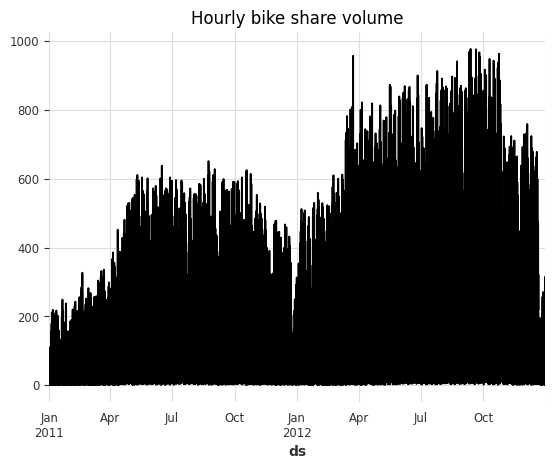

In [21]:
# Plot
df['y'].plot(title = 'Hourly bike share volume')
plt.show()

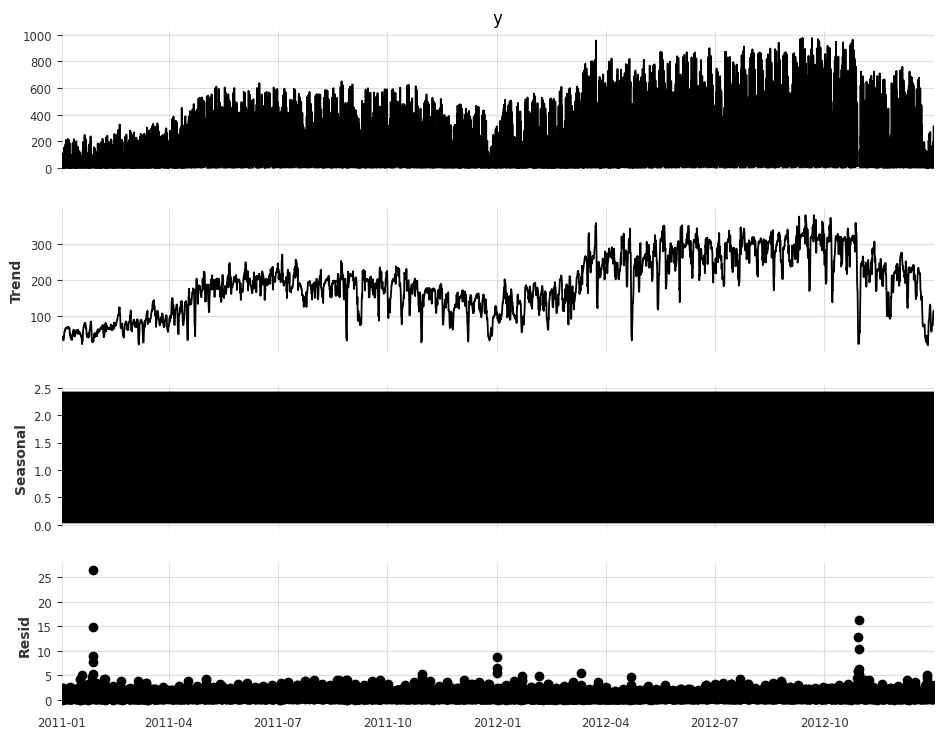

In [23]:
# Perform seasonal decomposition of the electricity price data using an additive model
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 24)

# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

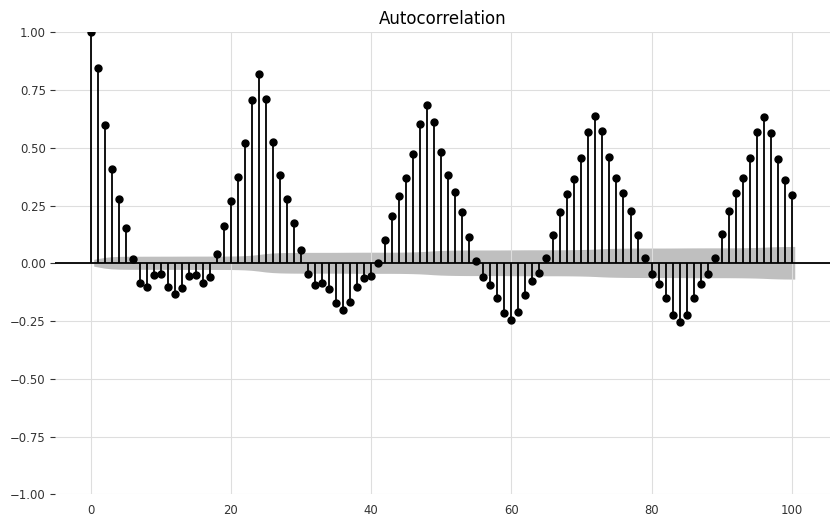

In [24]:
# Plot the autocorrelation function (ACF) for the time series data
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags=100, ax = ax)
plt.show()

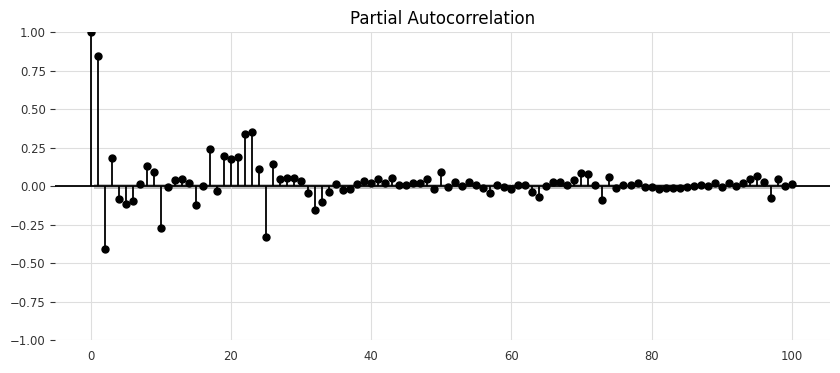

In [26]:
# Plot the partial autocorrelation function (PACF) for the time series data
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df['y'], lags=100, ax = ax)
plt.show()

# Data Preparation

In [ ]:
# Prepare a TimeSeries object from the dataframe with Hourly frequency
series = TimeSeries.from_dataframe(df,
                                   value_cols = 'y',
                                   freq = 'H')
series

<TimeSeries (DataArray) (ds: 17544, component: 1, sample: 1)> Size: 140kB
array([[[16.]],

       [[40.]],

       [[32.]],

       ...,

       [[90.]],

       [[61.]],

       [[49.]]])
Coordinates:
  * ds         (ds) datetime64[ns] 140kB 2011-01-01 ... 2012-12-31T23:00:00
  * component  (component) object 8B 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Function to encode the year as a normalized value
def encode_year(idx):
  return (idx.year - 2000) / 50

# Set up the add_encoders dictionary to specify how different time-related encoders and transformers should be applied
add_encoders = {
    'cyclic': {'future': ['hour', 'day', 'dayofweek', 'week','month']},
    'datetime_attribute': {'future': ['hour', 'day', 'dayofweek', 'week','month']},
    'position': {'past': ['relative'], 'future': ['relative']},
    'custom': {'past': [encode_year], 'future': [encode_year]},
    'transformer': Scaler(),
    'tz': 'CET'
}